# Building Neural Network with one layer

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

## Generating Datase

X dimensions are :  (100, 2)
y dimensions are :  (100, 1)


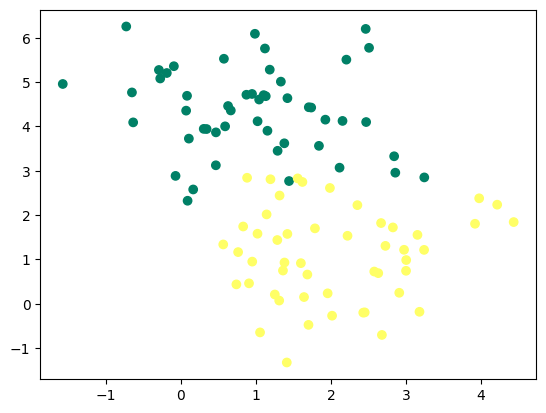

In [7]:
X,y = make_blobs(n_samples = 100, n_features= 2, centers= 2, random_state= 0)
y = y.reshape((y.shape[0],1))

print('X dimensions are : ', X.shape)
print('y dimensions are : ', y.shape)

#plot the distribution of the map 
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

## Functions :

In [2]:
def init_func(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [8]:
def model(X, W, b):
    Z = np.dot(X,W) + b
    # or Z = X.dot(W) + b same writing
    A  = 1/ (1 + np.exp(-Z))
    return A

In [9]:
def log_loss_func(A,y):
    return (1/len(y)) * np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [15]:
def update(dW,db,W,b,learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

In [10]:
def predict(X, W, b):
    A = model(X,W,b)
    return A >= 0.5

In [13]:
def ann(X,y,learning_rate = 0.1, n_iter = 100):
    #initialization of W,b
    W,b = init_func(X)
    loss=[]
    for i in range(n_iter):
        A = model(X,W,b)
        loss.append(log_loss_func(A,y))
        dW,db = gradient_func(A,X,y)
        W,b = update(dW,db,W,b,learning_rate)
    y_pred = predict(X,W,b)
    print("the accuracy of the prediction is :",accuracy_score(y,y_pred))
    plt.plot(loss)
    plt.show()
    return (W,b)
    

the accuracy of the prediction is : 0.89


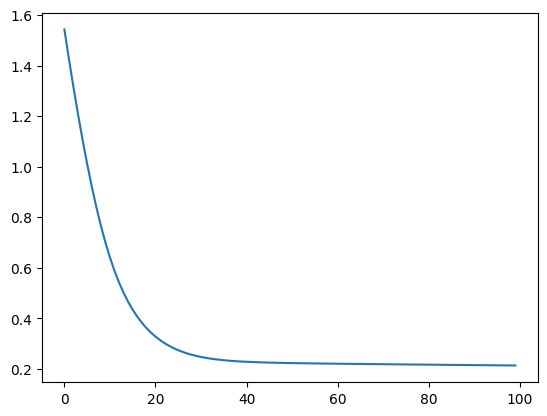

In [16]:
W,b = ann(X,y)

## Applying the classification done by the artificial neural network :

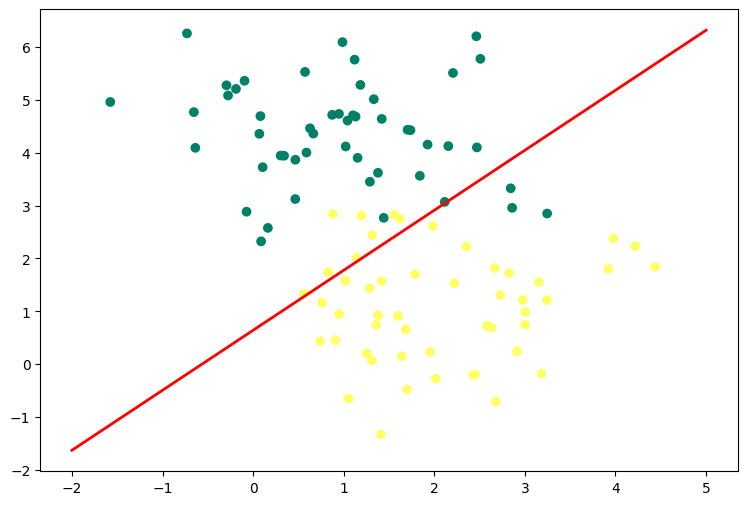

In [17]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-2, 5, 50)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='red', lw=2)

# To make sure that our decision boundary is correct we can count missclassified points, and they will be 13
# logical since our model gave an accuracy of 87% (100-87= 13)

## Deduction :

The classification was good as we can see in the last plot, few yellow points are classified as green, cause we have an acc of 0,89.
This is called a perceptron, and it's limited by non linear data.